# Comparison of FreeSolv hydration free energies with MM and QM/MM RE-EDS calculated values
Analysis of results and preparation of figures for the QM/MM RE-EDS paper.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

In [2]:
df = pd.read_csv("data/FreeSolv_database.txt", sep=';', skiprows=2)
df

,# compound id (and file prefix),SMILES,iupac name (or alternative if IUPAC is unavailable or not parseable by OEChem),experimental value (kcal/mol),experimental uncertainty (kcal/mol),Mobley group calculated value (GAFF) (kcal/mol),calculated uncertainty (kcal/mol),experimental reference (original or paper this value was taken from),calculated reference,text notes.
0,mobley_1017962,CCCCCC(=O)OC,methyl hexanoate,-2.49,0.6,-3.30,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availa...
1,mobley_1019269,CCCCO,butan-1-ol,-4.72,0.6,-3.23,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availa...
2,mobley_1034539,c1cc(c(cc1c2cc(c(c(c2Cl)Cl)Cl)Cl)Cl)Cl,"1,2,3,4-tetrachloro-5-(3,4-dichlorophenyl)ben...",-3.04,0.1,-1.08,0.04,10.1007/s10822-012-9568-8,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availa...
3,mobley_1036761,C1CCC(CC1)N,cyclohexanamine,-4.59,0.6,-3.95,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availa...
4,mobley_1046331,c1ccc(cc1)OC=O,phenyl formate,-3.82,0.6,-5.44,0.03,"J. Peter Guthrie, unpublished data, as provid...",10.1021/acs.jced.7b00104,Experimental uncertainty not presently availa...
...,...,...,...,...,...,...,...,...,...,...
637,mobley_9913368,C(=C/Cl)\Cl,"(E)-1,2-dichloroethylene",-0.78,0.6,1.02,0.02,10.1021/ct050097l,10.1021/acs.jced.7b00104,"Renamed mobley_9913368 from (E)-1,2-dichloroe..."
638,mobley_9942801,CCc1ccc(cc1)C,1-ethyl-4-methyl-benzene,-0.95,0.6,-0.57,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availa...
639,mobley_994483,CCBr,bromoethane,-0.74,0.6,0.49,0.02,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availa...
640,mobley_9974966,CC(C)SC(C)C,2-isopropylsulfanylpropane,-1.21,0.6,0.14,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availa...


In [3]:
def offset_comparison(dgs_exp, alch_dg_water, alch_dg_vacuum):
    """
    This function performs a direct comparison where the simulated delta_G values for 
    all states are calculated and offset by following the procedure described in:
    
    in eq. 2 of https://pubs.acs.org/doi/10.1021/acs.jctc.6b01141
     
    Here this hence returns N data points corresponding to dGs
    
    The error bars for state 1 are calculated as the average of all other errors. 
    
    
    Args
    -----
        ic50s:
            list of ic50s
        alch_dg_complex:
            list of alchemical deltaGs (1->1, 1->2, ..., 1->N) (average and standard deviations) in complex
        alch_dg_water
            list of alchemical deltaGs (1->1, 1->2, ..., 1->N) (average and standard deviations) in water
    
    Returns
    -------
        ddgs_exp, ddgs_sim
    """
    # Simulated vales - deltadeltaG hyd
    ddgs_hydration = alch_dg_water - alch_dg_vacuum
   
    # Offsetting all data points 
    n = len(ddgs_hydration)
    dgs_hydration = ddgs_hydration - (np.sum(ddgs_hydration) / n - np.sum(dgs_exp) / n )
   
    return dgs_hydration

def realign_with_exp(dgs_exp, dgs_sim):
    # Offsetting all data points 
    n = len(dgs_sim)
    return dgs_sim - (np.sum(dgs_sim) / n - np.sum(dgs_exp) / n )

In [4]:
def reorder_setC(values):
    "Reorders the results for set C according to molecule size"
    new_values = np.array([values[4], values[5], values[3], values[6], values[7], values[2], values[1], values[0]])
    return new_values

# QM model effect

## Set C

In [5]:
SMILES = [" CCCCOC[C@H](C)O", " CCCCOCCO", " CCOCCOCC", " OCC(O)CO", " C(C(CO)O)O", " OCCO", " C(CO)O", " COCCO", " CCOCCO", " CCCOCCO"] # ethylene glycol: 'OCCO' or 'C(CO)O'; glycerol: 'OCC(O)CO' or 'C(C(CO)O)O'

filtered_df = df[df[' SMILES'].isin(SMILES)]
filtered_df

,# compound id (and file prefix),SMILES,iupac name (or alternative if IUPAC is unavailable or not parseable by OEChem),experimental value (kcal/mol),experimental uncertainty (kcal/mol),Mobley group calculated value (GAFF) (kcal/mol),calculated uncertainty (kcal/mol),experimental reference (original or paper this value was taken from),calculated reference,text notes.
197,mobley_3259411,C(C(CO)O)O,glycerol,-13.43,1.00,-10.14,0.04,10.1007/s10822-010-9350-8,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availa...
288,mobley_4639255,C(CO)O,ethylene glycol,-9.30,0.60,-7.27,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availa...
291,mobley_4687447,CCCOCCO,2-propoxyethanol,-6.40,0.60,-3.94,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availa...
293,mobley_4690963,CCOCCOCC,"1,2-diethoxyethane",-3.54,0.60,-3.42,0.04,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availa...
370,mobley_5816127,COCCO,2-methoxyethanol,-6.62,0.40,-4.69,0.03,10.1007/BF00646936 and 10.1136/oem.45.8.561,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availa...
373,mobley_5880265,CCCCOCCO,2-butoxyethanol,-6.25,0.60,-3.85,0.04,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availa...
517,mobley_7913234,CCCCOC[C@H](C)O,1-butoxy-2-propanol,-5.73,0.15,-3.89,0.04,SAMPL4_Guthrie,10.1021/acs.jced.7b00104,Renamed mobley_7913234 from 1-butoxy-2-propan...
622,mobley_9626434,CCOCCO,2-ethoxyethanol,-6.69,0.60,-4.41,0.03,10.1021/ct050097l,10.1021/acs.jced.7b00104,Experimental uncertainty not presently availa...


In [6]:
#####################
## Set C FreeSolv ###
#####################
# load the experimental data
SMILES = [" C(CO)O", " COCCO", " C(C(CO)O)O", " CCOCCO", " CCCOCCO", " CCOCCOCC", " CCCCOCCO", " CCCCOC[C@H](C)O"]

experimental_setc = []
experimental_setc_err = []
FreeSolvcalc_setc = []
FreeSolvcalc_setc_err = []

for SMILES in SMILES:
    filtered_df = df[df[' SMILES'].isin([SMILES])]
    experimental_setc.append(float(filtered_df[' experimental value (kcal/mol)'])*4.184)
    experimental_setc_err.append(float(filtered_df[' experimental uncertainty (kcal/mol)'])*4.184)
    FreeSolvcalc_setc.append(float(filtered_df[' Mobley group calculated value (GAFF) (kcal/mol)'])*4.184)
    FreeSolvcalc_setc_err.append(float(filtered_df[' calculated uncertainty (kcal/mol)'])*4.184)
experimental_setc

/tmp/ipykernel_424364/2114755569.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  experimental_setc.append(float(filtered_df[' experimental value (kcal/mol)'])*4.184)
/tmp/ipykernel_424364/2114755569.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  experimental_setc_err.append(float(filtered_df[' experimental uncertainty (kcal/mol)'])*4.184)
/tmp/ipykernel_424364/2114755569.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  FreeSolvcalc_setc.append(float(filtered_df[' Mobley group calculated value (GAFF) (kcal/mol)'])*4.184)
/tmp/ipykernel_424364/2114755569.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(

[-38.91120000000001,
 -27.69808,
 -56.19112,
 -27.99096,
 -26.777600000000003,
 -14.81136,
 -26.150000000000002,
 -23.974320000000002]

In [7]:
#####################
#### Set C GFN1 #####
#####################
# load the data
zwanzig_ddgs_setcqmmmgfn1 = np.array([np.load(f'data/setc_qmmm_gfn1_{i}.npy') for i in range(10)])

ddgs_setcqmmmgfn1_sharedR = np.mean(np.array(zwanzig_ddgs_setcqmmmgfn1), axis = 0)
ddgs_setcqmmmgfn1_sharedR_err = np.std(np.array(zwanzig_ddgs_setcqmmmgfn1), axis = 0)

print("DeltadeltaG mean over 10 random seeds relative to VR for GFN1-xTB QM/MM set C: ", ddgs_setcqmmmgfn1_sharedR, " standard deviations: ", ddgs_setcqmmmgfn1_sharedR_err)

#####################
#### Set C GFN2  ####
#####################
# load the data
zwanzig_ddgs_setcqmmmgfn2 = np.array([np.load(f'data/setc_qmmm_gfn2_{i}.npy') for i in range(10)])

ddgs_setcqmmmgfn2_sharedR = np.mean(np.array(zwanzig_ddgs_setcqmmmgfn2), axis = 0)
ddgs_setcqmmmgfn2_sharedR_err = np.std(np.array(zwanzig_ddgs_setcqmmmgfn2), axis = 0)

print("DeltadeltaG mean over 10 random seeds relative to VR for QM/MM set C: ", ddgs_setcqmmmgfn2_sharedR, " standard deviations: ", ddgs_setcqmmmgfn2_sharedR_err)

#####################
#### Set C DFTB #####
#####################
# load the data
zwanzig_ddgs_setcqmmmdftb = np.array([np.load(f'data/setc_qmmm_dftb_{i}.npy') for i in range(10)])

ddgs_setcqmmmdftb_sharedR = np.mean(np.array(zwanzig_ddgs_setcqmmmdftb), axis = 0)
ddgs_setcqmmmdftb_sharedR_err = np.std(np.array(zwanzig_ddgs_setcqmmmdftb), axis = 0)

print("DeltadeltaG mean over 10 random seeds relative to VR for DFTB QM/MM set C: ", ddgs_setcqmmmdftb_sharedR, " standard deviations: ", ddgs_setcqmmmdftb_sharedR_err)

DeltadeltaG mean over 10 random seeds relative to VR for GFN1-xTB QM/MM set C:  [  6.59467071   3.58993016   8.00889622 -20.22664276  -9.26230843
  -3.43268441  -1.03889726   1.24341435]  standard deviations:  [1.52481186 0.8287743  1.42295437 0.63458284 1.78481754 0.75281528
 0.68281023 0.79567348]
DeltadeltaG mean over 10 random seeds relative to VR for QM/MM set C:  [ 6.16345983  8.17326564 14.53644453 -7.13086929  6.88928069 12.85571018
 11.0084599   9.89747077]  standard deviations:  [0.37691638 0.27287596 0.29334083 0.17391713 0.34038891 0.29140797
 0.12107822 0.27142933]
DeltadeltaG mean over 10 random seeds relative to VR for DFTB QM/MM set C:  [  4.37995182   1.81453866  10.19785558 -25.28583818 -14.80534549
  -4.22884541  -2.0920899   -0.11653593]  standard deviations:  [0.92518134 0.65229595 1.16934299 0.95332214 1.20059412 0.78828762
 0.70515627 0.81779987]


In [8]:
# get diols GFN1-xTB QM/MM delta G
dgs_setcqmmmgfn1 = reorder_setC(realign_with_exp(experimental_setc, ddgs_setcqmmmgfn1_sharedR))
dgs_setcqmmmgfn1err = reorder_setC(ddgs_setcqmmmgfn1_sharedR_err)

# get diols QM/MM delta G
dgs_setcqmmmgfn2 = reorder_setC(realign_with_exp(experimental_setc, ddgs_setcqmmmgfn2_sharedR))
dgs_setcqmmmgfn2err = reorder_setC(ddgs_setcqmmmgfn2_sharedR_err)

# get diols DFTB QM/MM delta G
dgs_setcqmmmdftb = reorder_setC(realign_with_exp(experimental_setc, ddgs_setcqmmmdftb_sharedR))
dgs_setcqmmmdftberr = reorder_setC(ddgs_setcqmmmdftb_sharedR_err)

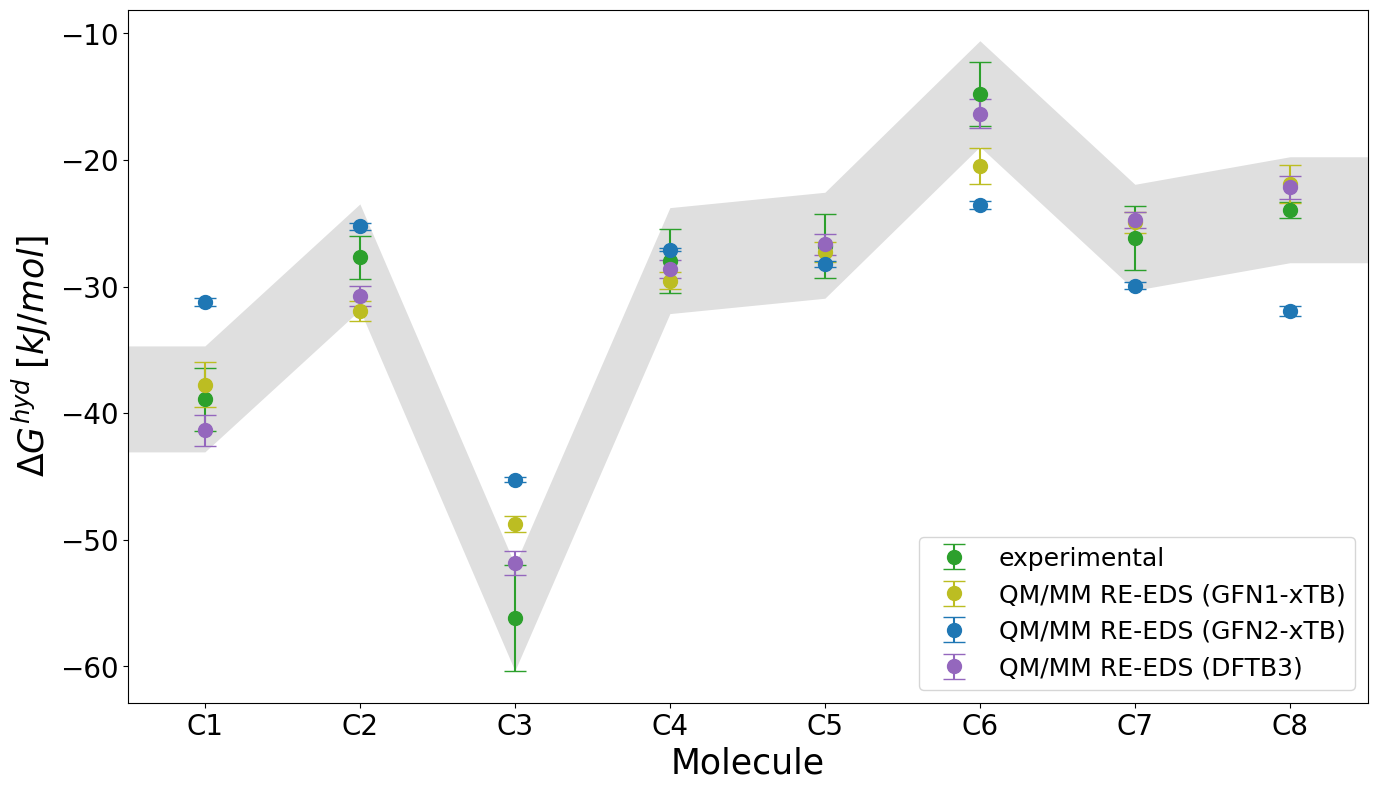

In [9]:
xspan = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 8.5]
experimental = np.array([experimental_setc[0]] + experimental_setc + [experimental_setc[-1]])

x = range(1,9)

plt.figure(figsize=(16,9))
plt.errorbar(range(1,9), experimental_setc, yerr=experimental_setc_err, linestyle='none', marker='o', markersize=10, capsize=8, label='experimental', color='tab:green')
plt.errorbar(range(1,9), dgs_setcqmmmgfn1, yerr=dgs_setcqmmmgfn1err, linestyle='none', marker='o', markersize=10, capsize=8, label='QM/MM RE-EDS (GFN1-xTB)', color='tab:olive')
plt.errorbar(range(1,9), dgs_setcqmmmgfn2, yerr=dgs_setcqmmmgfn2err, linestyle='none', marker='o', markersize=10, capsize=8, label='QM/MM RE-EDS (GFN2-xTB)', color='tab:blue')
plt.errorbar(range(1,9), dgs_setcqmmmdftb, yerr=dgs_setcqmmmdftberr, linestyle='none', marker='o', markersize=10, capsize=8, label='QM/MM RE-EDS (DFTB3)', color='tab:purple')
plt.fill_between(xspan, experimental - 4.184, experimental + 4.184, alpha=0.25, color='grey', edgecolor='none')
plt.xlim(0.5, 8.5)
plt.xlabel('Molecule', fontsize=25)
plt.ylabel(r"$ΔG^{hyd}\; [kJ/mol]$", fontsize=25)
plt.xticks(ticks=x, labels=['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'])
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(fontsize=18, loc='lower right')
#plt.savefig("setC_qmmodel_dG.png", bbox_inches='tight', dpi=600)

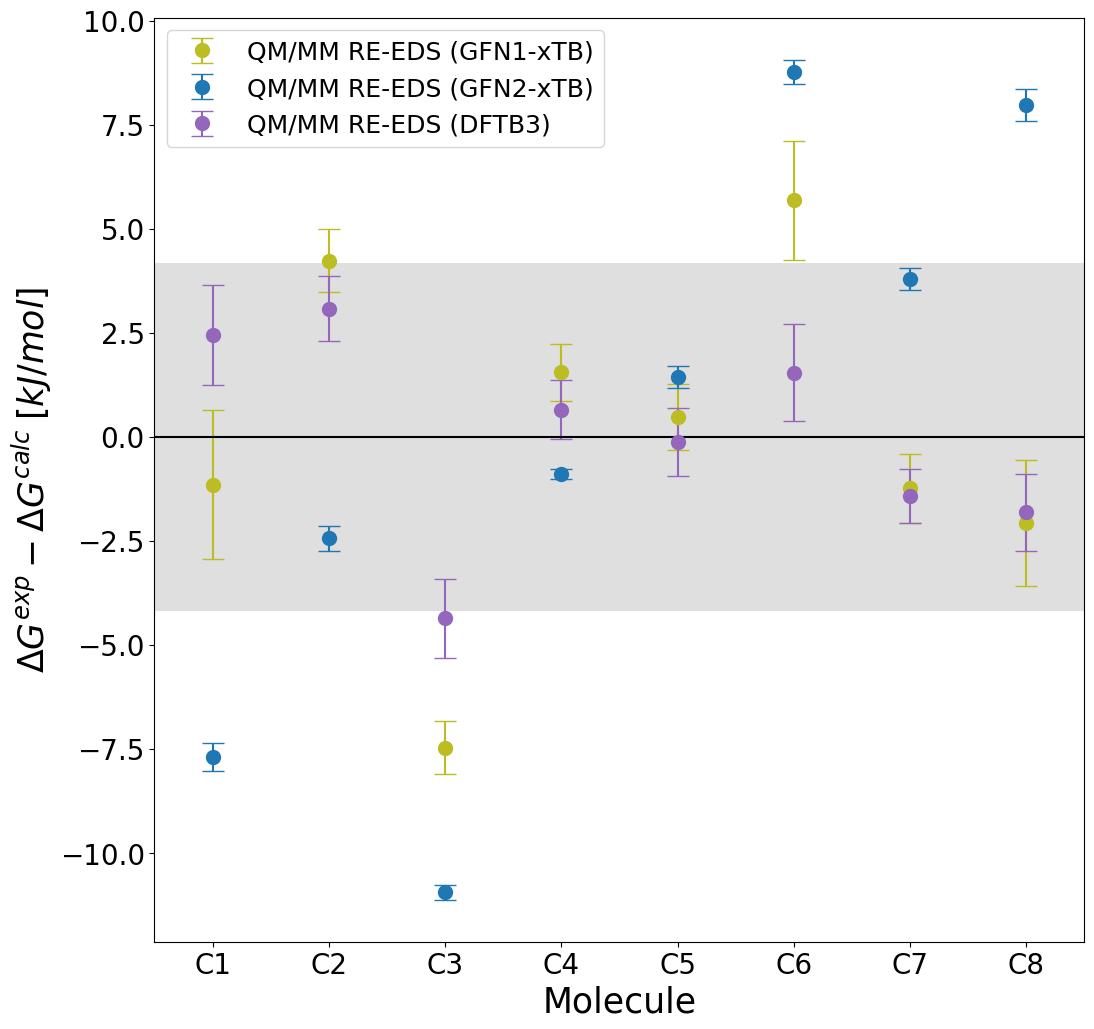

In [10]:
plt.figure(figsize=(12,12))
plt.axhspan(-4.184, 4.184, facecolor='grey', alpha=0.25, edgecolor='none')
plt.errorbar(range(1,9), experimental_setc-dgs_setcqmmmgfn1, yerr=dgs_setcqmmmgfn1err, linestyle='none', marker='o', markersize=10, capsize=8, label='QM/MM RE-EDS (GFN1-xTB)', color='tab:olive')
plt.errorbar(range(1,9), experimental_setc-dgs_setcqmmmgfn2, yerr=dgs_setcqmmmgfn2err, linestyle='none', marker='o', markersize=10, capsize=8, label='QM/MM RE-EDS (GFN2-xTB)', color='tab:blue')
plt.errorbar(range(1,9), experimental_setc-dgs_setcqmmmdftb, yerr=dgs_setcqmmmdftberr, linestyle='none', marker='o', markersize=10, capsize=8, label='QM/MM RE-EDS (DFTB3)', color='tab:purple')
plt.axhline(0, color='black')
plt.xlim(0.5, 8.5)
plt.xlabel('Molecule', fontsize=25)
plt.ylabel(r'$ΔG^{exp} - ΔG^{calc}\; [kJ/mol]$', fontsize=25)
plt.xticks(ticks=x, labels=['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'])
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(fontsize=18, loc='upper left')
#plt.savefig("setC_qmmodel_err.png", bbox_inches='tight', dpi=600)

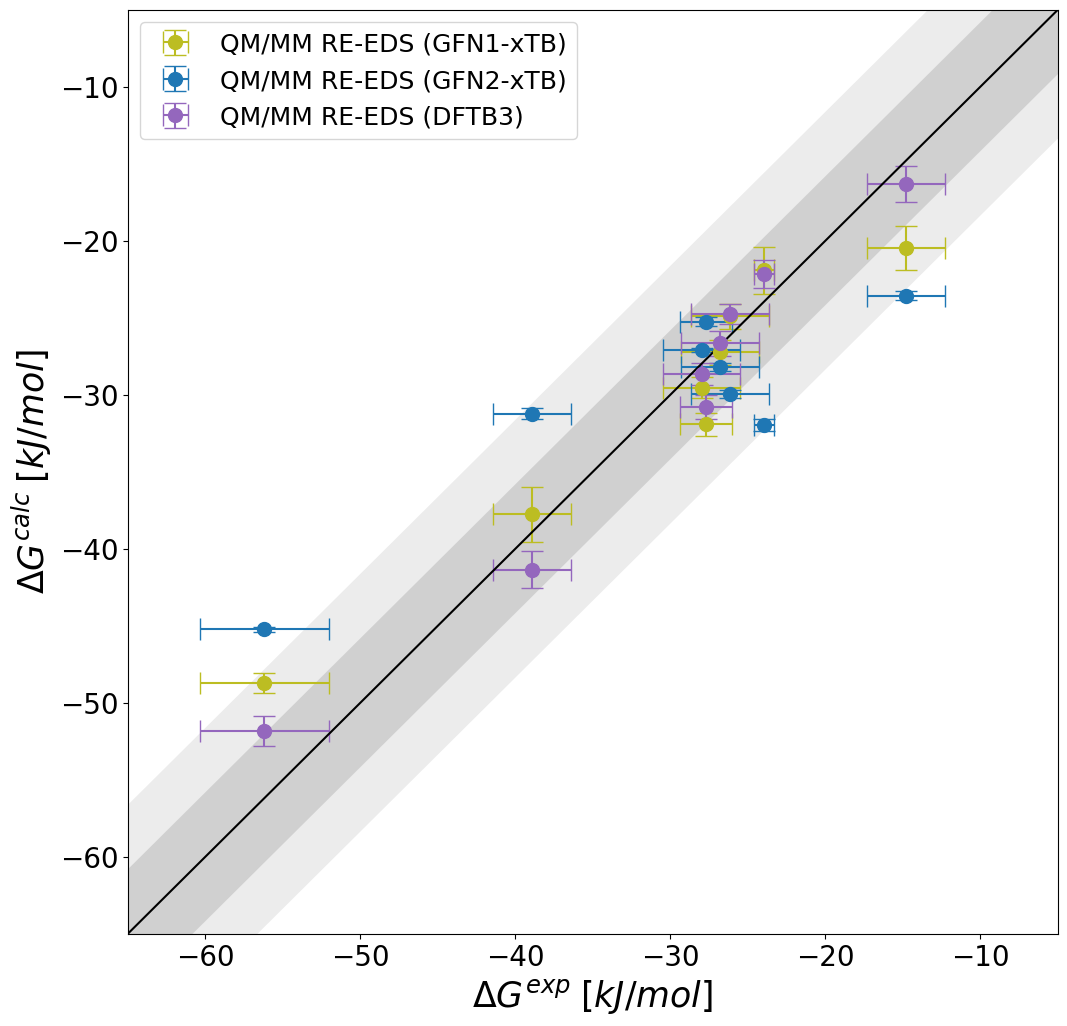

In [11]:
plt.figure(figsize=(12,12))
plt.errorbar(experimental_setc, dgs_setcqmmmgfn1, xerr=experimental_setc_err, yerr= dgs_setcqmmmgfn1err, linestyle='none', marker='o', markersize=10, capsize=8, label='QM/MM RE-EDS (GFN1-xTB)', color='tab:olive')
plt.errorbar(experimental_setc, dgs_setcqmmmgfn2, xerr=experimental_setc_err, yerr= dgs_setcqmmmgfn2err, linestyle='none', marker='o', markersize=10, capsize=8, label='QM/MM RE-EDS (GFN2-xTB)', color='tab:blue')
plt.errorbar(experimental_setc, dgs_setcqmmmdftb, xerr=experimental_setc_err, yerr= dgs_setcqmmmdftberr, linestyle='none', marker='o', markersize=10, capsize=8, label='QM/MM RE-EDS (DFTB3)', color='tab:purple')
plt.plot([-70,0], [-70,0], color='black')
plt.fill_between([-70,0], [-74.184,-4.184], [-65.816, 4.184], alpha=0.25, color='grey', edgecolor='none')
plt.fill_between([-70,0], [-78.368,-8.368], [-61.632, 8.368], alpha=0.15, color='grey', edgecolor='none')
plt.xlim(-65,-5)
plt.ylim(-65,-5)
plt.xlabel(r'$ΔG^{exp}\; [kJ/mol]$', fontsize=25)
plt.ylabel(r'$ΔG^{calc}\; [kJ/mol]$', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(fontsize=18)
#plt.savefig("setC_qmmodel_corr.png", bbox_inches='tight', dpi=600)

In [12]:
rmse_setc_qmmmgfn1 = root_mean_squared_error(experimental_setc, dgs_setcqmmmgfn1)
mae_setc_qmmmgfn1 = mean_absolute_error(experimental_setc, dgs_setcqmmmgfn1)
r2_setc_qmmmgfn1 = r2_score(experimental_setc, dgs_setcqmmmgfn1)
spearman_setc_qmmmgfn1 = stats.spearmanr(experimental_setc, dgs_setcqmmmgfn1)
kendall_setc_qmmmgfn1 = stats.kendalltau(experimental_setc, dgs_setcqmmmgfn1)
pearson_setc_qmmmgfn1 = stats.pearsonr(experimental_setc, dgs_setcqmmmgfn1)

print("Set C QM/MM GFN1-xTB:\nRMSE: ", rmse_setc_qmmmgfn1, "\nMAE: ", mae_setc_qmmmgfn1, "\nR2: ", r2_setc_qmmmgfn1, "\nSpearman: ", spearman_setc_qmmmgfn1, "\nKendall's tau: ", kendall_setc_qmmmgfn1, "\nPearson: ", pearson_setc_qmmmgfn1, "\n")

rmse_setc_qmmmgfn2 = root_mean_squared_error(experimental_setc, dgs_setcqmmmgfn2)
mae_setc_qmmmgfn2 = mean_absolute_error(experimental_setc, dgs_setcqmmmgfn2)
r2_setc_qmmmgfn2 = r2_score(experimental_setc, dgs_setcqmmmgfn2)
spearman_setc_qmmmgfn2 = stats.spearmanr(experimental_setc, dgs_setcqmmmgfn2)
kendall_setc_qmmmgfn2 = stats.kendalltau(experimental_setc, dgs_setcqmmmgfn2)
pearson_setc_qmmmgfn2 = stats.pearsonr(experimental_setc, dgs_setcqmmmgfn2)

print("Set C QM/MM GFN2-xTB:\nRMSE: ", rmse_setc_qmmmgfn2, "\nMAE: ", mae_setc_qmmmgfn2, "\nR2: ", r2_setc_qmmmgfn2, "\nSpearman: ", spearman_setc_qmmmgfn2, "\nKendall's tau: ", kendall_setc_qmmmgfn2, "\nPearson: ", pearson_setc_qmmmgfn2, "\n")

rmse_setc_qmmmdftb = root_mean_squared_error(experimental_setc, dgs_setcqmmmdftb)
mae_setc_qmmmdftb = mean_absolute_error(experimental_setc, dgs_setcqmmmdftb)
r2_setc_qmmmdftb = r2_score(experimental_setc, dgs_setcqmmmdftb)
spearman_setc_qmmmdftb = stats.spearmanr(experimental_setc, dgs_setcqmmmdftb)
kendall_setc_qmmmdftb = stats.kendalltau(experimental_setc, dgs_setcqmmmdftb)
pearson_setc_qmmmdftb = stats.pearsonr(experimental_setc, dgs_setcqmmmdftb)

print("Set C QM/MM DFTB3:\nRMSE: ", rmse_setc_qmmmdftb, "\nMAE: ", mae_setc_qmmmdftb, "\nR2: ", r2_setc_qmmmdftb, "\nSpearman: ", spearman_setc_qmmmdftb, "\nKendall's tau: ", kendall_setc_qmmmdftb, "\nPearson: ", pearson_setc_qmmmdftb, "\n")

Set C QM/MM GFN1-xTB:
RMSE:  3.8025218217538046 
MAE:  2.982945098270189 
R2:  0.8915031613021336 
Spearman:  SignificanceResult(statistic=0.9761904761904763, pvalue=3.3143960262001043e-05) 
Kendall's tau:  SignificanceResult(statistic=0.9285714285714285, pvalue=0.0003968253968253968) 
Pearson:  PearsonRResult(statistic=0.9686543287523126, pvalue=7.519802035722604e-05) 

Set C QM/MM GFN2-xTB:
RMSE:  6.5435594779970785 
MAE:  5.49125258937338 
R2:  0.6787066308046832 
Spearman:  SignificanceResult(statistic=0.4285714285714286, pvalue=0.2894032248467901) 
Kendall's tau:  SignificanceResult(statistic=0.2857142857142857, pvalue=0.39875992063492066) 
Pearson:  PearsonRResult(statistic=0.8976728065786603, pvalue=0.002477267284805462) 

Set C QM/MM DFTB3:
RMSE:  2.304884907609466 
MAE:  1.9252476998164485 
R2:  0.9601368014792729 
Spearman:  SignificanceResult(statistic=0.9761904761904763, pvalue=3.3143960262001043e-05) 
Kendall's tau:  SignificanceResult(statistic=0.9285714285714285, pvalue=